In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_rows',10)

In [61]:
# .plot(kind='bar', rot=45, stacked=True)
# return res_df[res_df['Name'] in list_names].groupby(['Year']).sum()
path_dir = 'E:/НЕТОЛОГИЯ_КУРСЫ/Профессия Питон/2ч Продвинутый PYTHON/++2.5Data_analysis1/hw_data_analysis1/names/'
begin_year = 1900
end_year = 2000
list_names = ['Ruth','Robert']

In [62]:
# 1.	Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

list_df = []
for year in range(begin_year,end_year + 1):
    full_path = os.path.join(path_dir,f"yob{year}.txt")
    df = pd.read_csv(full_path, names=['Name', 'Gender', 'Count'], encoding = 'ISO-8859-1')
    df['Year'] = year
    list_df.append(df)
res_df = pd.concat(list_df)    
res_df

,Name,Gender,Count,Year
0,Mary,F,16706,1900
1,Helen,F,6343,1900
2,Anna,F,6114,1900
3,Margaret,F,5304,1900
4,Ruth,F,4765,1900
...,...,...,...,...
29767,Zeph,M,5,2000
29768,Zeven,M,5,2000
29769,Ziggy,M,5,2000
29770,Zo,M,5,2000


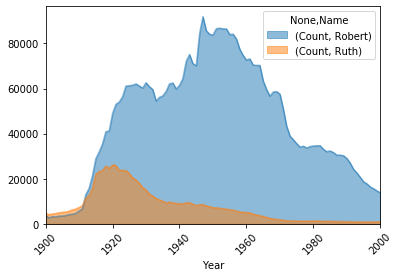

In [63]:
res = res_df[(res_df['Name']=='Ruth') | (res_df['Name']=='Robert')].groupby(['Name', 'Year']).sum()
# res
res.unstack('Name').plot(kind='area', rot=45, stacked=False)

In [64]:
# 2.	Построить столбчатую диаграмму по количеству их имен с 1900 по 2000 
# с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

list_df = []
for year in range(begin_year,end_year + 1, 5):
    full_path = os.path.join(path_dir,f"yob{year}.txt")
    df = pd.read_csv(full_path, names=['Name', 'Gender', 'Count'], encoding = 'ISO-8859-1')
    df['Year'] = year
    list_df.append(df)
res_df = pd.concat(list_df)    
res_df

,Name,Gender,Count,Year
0,Mary,F,16706,1900
1,Helen,F,6343,1900
2,Anna,F,6114,1900
3,Margaret,F,5304,1900
4,Ruth,F,4765,1900
...,...,...,...,...
29767,Zeph,M,5,2000
29768,Zeven,M,5,2000
29769,Ziggy,M,5,2000
29770,Zo,M,5,2000


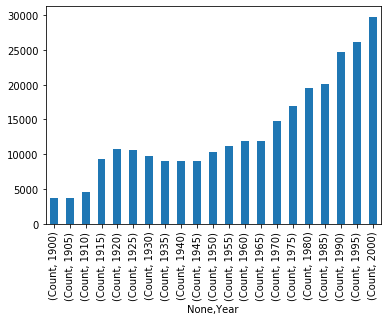

In [67]:
res = res_df[['Year','Count']].groupby(['Year']).count()
# res
res.unstack().plot(kind='bar')

In [113]:
# 3.	Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

year = 1950
full_path = os.path.join(path_dir,f"yob{year}.txt")
res_df = pd.read_csv(full_path, names=['Name', 'Gender', 'Count'], encoding = 'ISO-8859-1')
res = res_df[res_df['Name'].str.contains("^R")].groupby(['Name']).sum().sort_values('Count', ascending=0).head(10)
res

,Count
Name,
Robert,83762
Richard,51096
Ronald,29982
Roger,12576
Raymond,11218
Rebecca,9444
Ruth,7138
Roy,6487
Rita,6437
